# Clustering Jerárquico

## Carga de paquetes

In [15]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials 

import pylab


import scipy.cluster.hierarchy

# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido


from scipy.signal import savgol_filter

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
#sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import funciones as fn

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples #Librería Silhouette

from sklearn.cluster import AgglomerativeClustering #Librería para etiquetar por clustering aglomerativo

## Carga de dataset

In [2]:
df_base = pd.read_pickle('C:/Users/npezzot/prueba/sources/dataset_integrado.pickle')
df_2 = df_base
columnas = df_2.columns

## Selecciono features a utilizar

In [3]:
features_af = ['danceability','energy','loudness','speechiness','acousticness','acousticness','valence']
features_af_otras= ['duration_ms','tempo','time_signature']
features_aa = ['p00_C_50','p01_C#_50','p02_D_50','p03_D#_50','p04_E_50','p05_F_50']

In [4]:
genre_real = df_2['genre']

In [5]:
df_2.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,is_local,name,popularity,track_number,...,t02_75,t03_75,t04_75,t05_75,t06_75,t07_75,t08_75,t09_75,t10_75,t11_75
id,,,,,,,,,,,,,,,,,,,,,
4d3XHYFFuYYzxWr2cJ6yQl,"{'album_type': 'ALBUM', 'artists': [{'external...",Tommy Flanagan,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,349600,False,False,Angel Eyes - Studio,49,3,...,45.63800,69.10000,46.32300,-11.07600,26.7100,12.61400,8.86100,15.50700,-1.12600,13.90700
3X3p3u03P8eFL8WTH0oaaU,"{'album_type': 'ALBUM', 'artists': [{'external...",Art Farmer,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,344066,False,False,Fair Weather - Remastered,47,2,...,42.60550,27.08675,46.55975,-6.95200,17.8815,21.08100,-1.19175,10.23325,-1.91975,11.76825
4KlXeaheot0OI9PoOWspvZ,"{'album_type': 'ALBUM', 'artists': [{'external...",Christian Scott aTunde Adjuah,"[CA, US]",1,348746,False,False,Cease Fire,13,5,...,30.23200,61.02800,47.58400,-6.08450,10.7075,10.66850,14.46150,8.38950,2.20300,14.25750
3j76McoUI18gDoqxYE14Bu,"{'album_type': 'ALBUM', 'artists': [{'external...",Skalpel,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,275935,False,False,Sea,25,8,...,-29.43625,18.17000,76.50600,-24.85925,-0.3540,0.67725,3.75850,11.49625,4.34575,6.89050
4zxd4tiXPlWMqoJltbVTbE,"{'album_type': 'ALBUM', 'artists': [{'external...",Miles Davis,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",2,284560,False,False,Stella By Starlight,56,3,...,43.80525,21.55400,62.00050,8.28325,-14.5630,12.20475,11.85700,10.73250,2.73800,7.29425


In [6]:
df_2 = df_2[features_af]

##  Escalado rango 0-1

In [7]:
# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_2=scaler.fit_transform(df_2)
df_2 = pd.DataFrame(df_2)
df_2.columns = features_af
df_2

,danceability,energy,loudness,speechiness,acousticness,acousticness,valence
0,0.514799,0.144793,0.584505,0.060910,0.879518,0.879518,0.144162
1,0.650106,0.203945,0.641265,0.051225,0.875502,0.875502,0.503553
2,0.837209,0.301196,0.775782,0.047725,0.548193,0.548193,0.430457
3,0.708245,0.532794,0.639887,0.036523,0.710843,0.710843,0.339086
4,0.512685,0.143790,0.712373,0.042240,0.915663,0.915663,0.249746
...,...,...,...,...,...,...,...
4077,0.479915,0.992982,0.856646,0.052975,0.000017,0.000017,0.229442
4078,0.604651,0.803493,0.719657,0.036173,0.000501,0.000501,0.112690
4079,0.711416,0.796475,0.817166,0.050525,0.008092,0.008092,0.485279
4080,0.601480,0.729301,0.847459,0.041190,0.083936,0.083936,0.500508


## Filtro filas para acelerar procesamiento

In [8]:
#Trabajo con primeras 200 filas
df_2 = df_2.iloc[:100,:]
df_2

,danceability,energy,loudness,speechiness,acousticness,acousticness,valence
0,0.514799,0.144793,0.584505,0.060910,0.879518,0.879518,0.144162
1,0.650106,0.203945,0.641265,0.051225,0.875502,0.875502,0.503553
2,0.837209,0.301196,0.775782,0.047725,0.548193,0.548193,0.430457
3,0.708245,0.532794,0.639887,0.036523,0.710843,0.710843,0.339086
4,0.512685,0.143790,0.712373,0.042240,0.915663,0.915663,0.249746
...,...,...,...,...,...,...,...
95,0.405920,0.035511,0.425097,0.052392,0.998996,0.998996,0.117766
96,0.544397,0.489683,0.773683,0.037690,0.239960,0.239960,0.693401
97,0.671247,0.584929,0.696034,0.042357,0.327309,0.327309,0.618274
98,0.494715,0.395440,0.678383,0.040957,0.847390,0.847390,0.219289


## Cluestering Jerárquico

### Método average

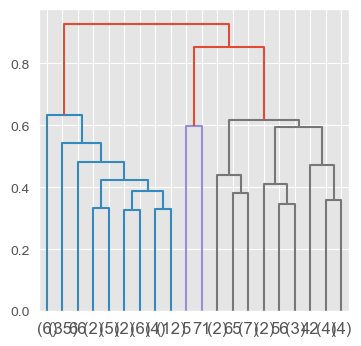

In [43]:
# Clustering (scipy)
z = linkage(df_2, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(z, p=20 ,truncate_mode = 'lastp')

### Estiramiento de la imagen

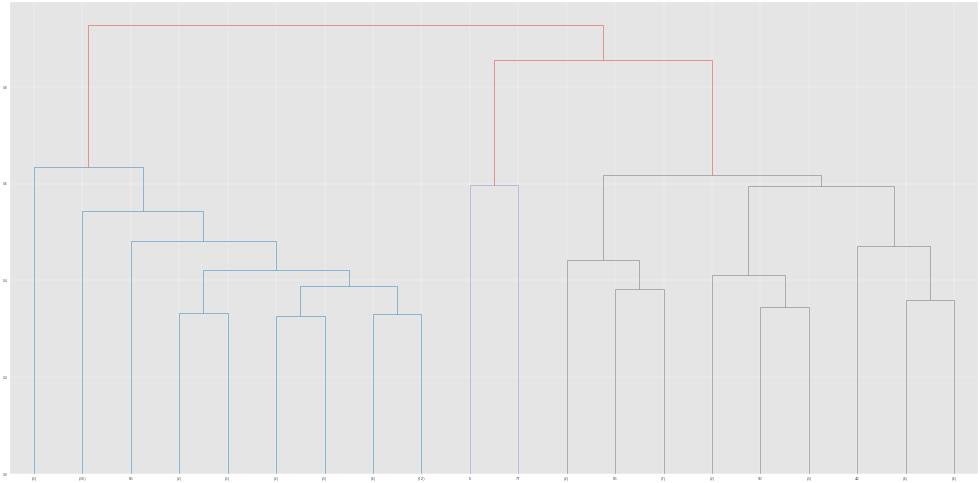

In [45]:
plt.rcParams['figure.figsize'] = [50, 25]
plt.rcParams['figure.dpi'] = 25 # 200 e.g. is really fine, but slower
plt.figure()
dn = dendrogram(z, p=20 ,truncate_mode = 'lastp')

## Matriz de distancia entre las observaciones

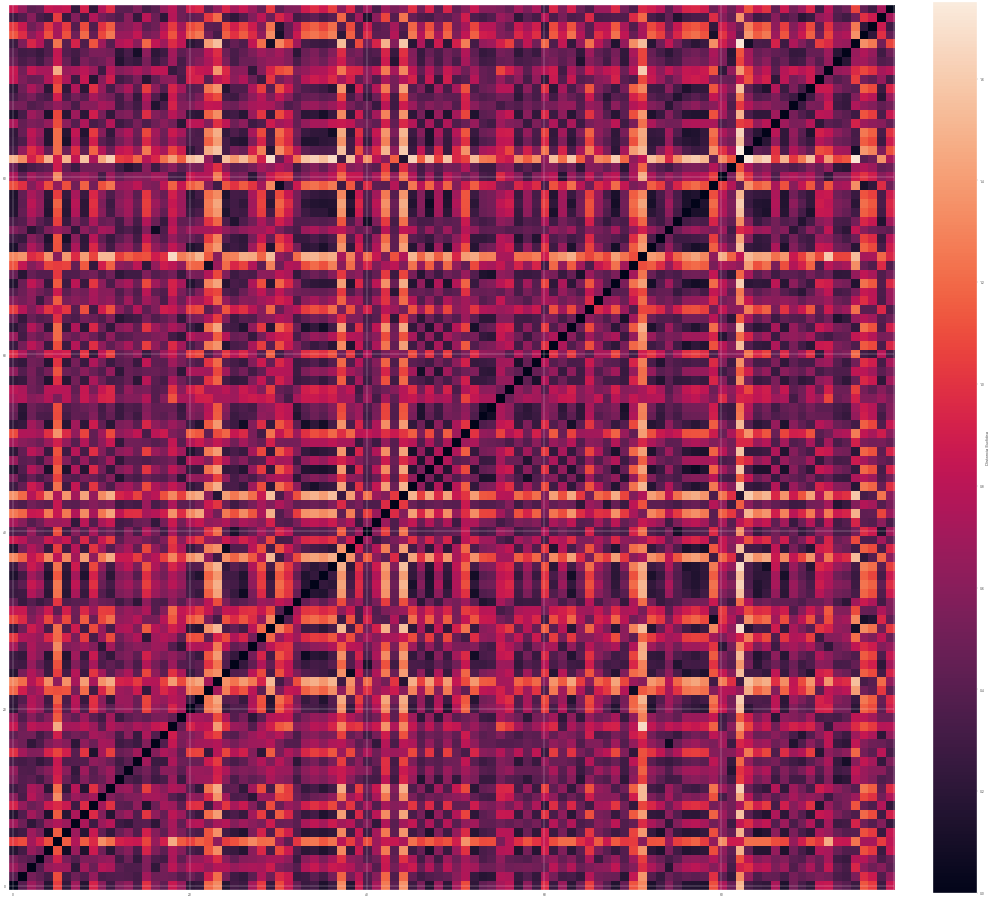

In [11]:
d  = euclidean_distances(df_2, df_2)

plt.figure(figsize=(50,50))
plt.imshow(d,aspect='auto',origin='bottom');
plt.colorbar(label='Distancia Euclidea',fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
#plt.xlabel('Tiempo (segundos)');

## Gráfico dendrograma y Matriz de correlación

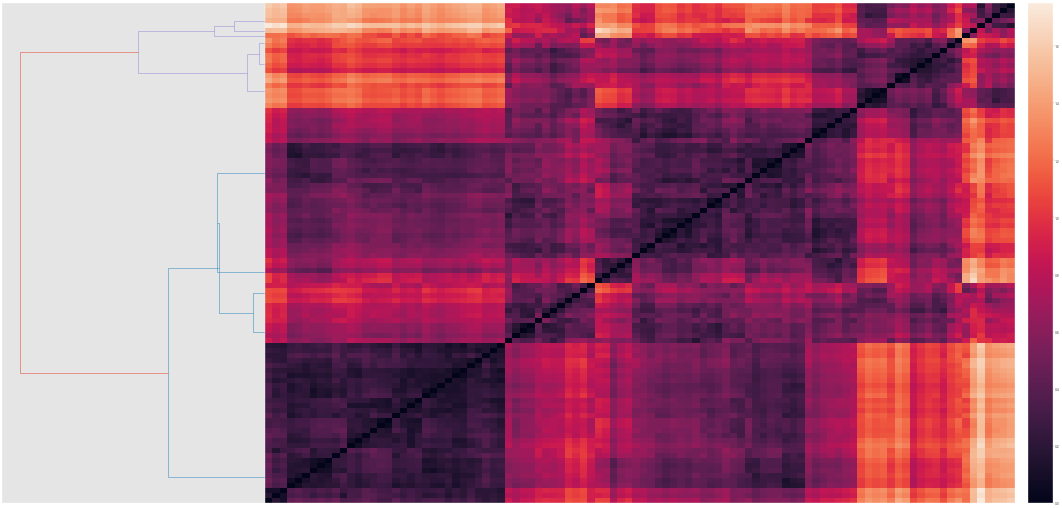

In [80]:
# Abrir figura nueva
fig = pylab.figure()

# Calcular dendrograma y graficar.
axdendro = fig.add_axes([0.09,0.1,0.3,0.8])
Y = linkage(d, method='centroid')
Z = dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])
axdendro.invert_xaxis()

# Graficar la matriz de distancias.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
d = d[index,:]
d = d[:,index]
im = axmatrix.matshow(d, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Graficar la barra de color
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)


## Silouhette y SSE

In [25]:
## Silhuette promedio usando sklearn
df=df_2
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_predicted = cluster.fit_predict(df)
silhouette_avg = silhouette_score(df, labels_predicted)
silhouette_avg

0.4342042266470825

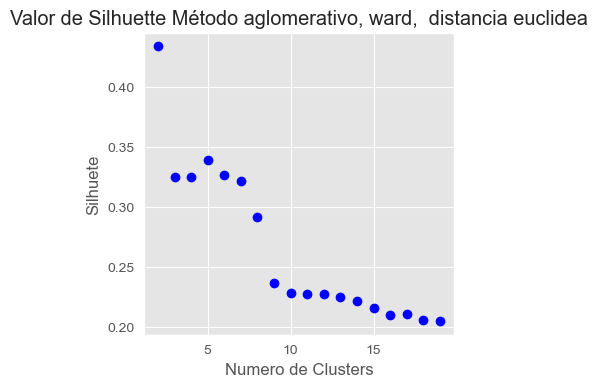

In [35]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, ward,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

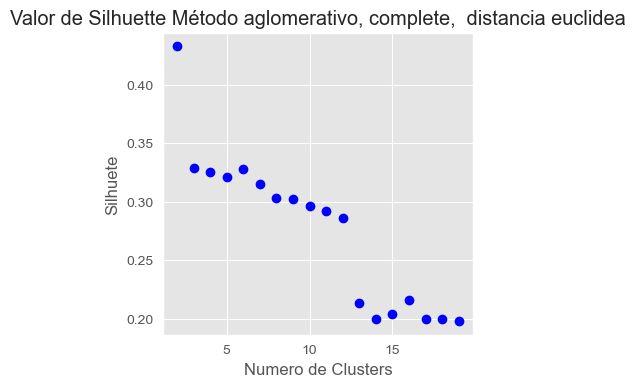

In [38]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, complete,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

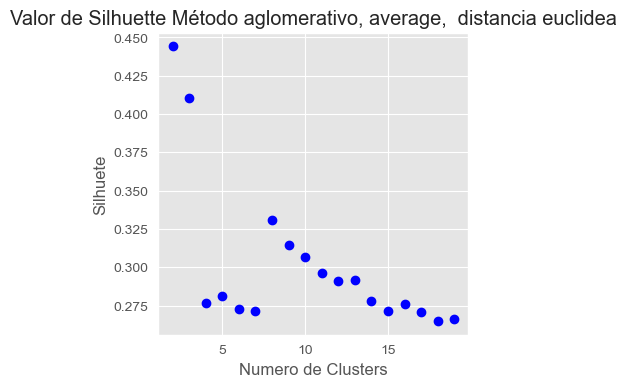

In [41]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, average,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

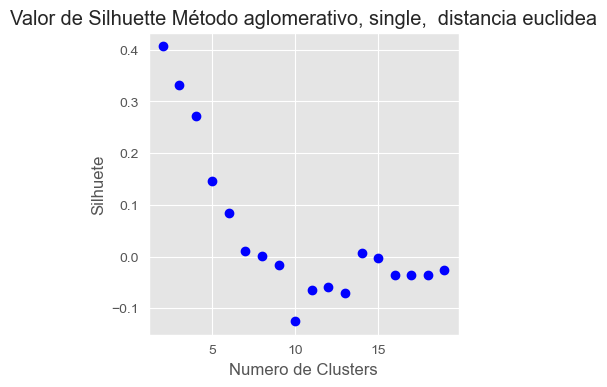

In [42]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, single,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

###  SSE (?) PARA JERARQUICO CREO QUE NO TIENE SENTIDO

## Validación de Clustering Jerarquico (Coeficiente de correlación cofenético)

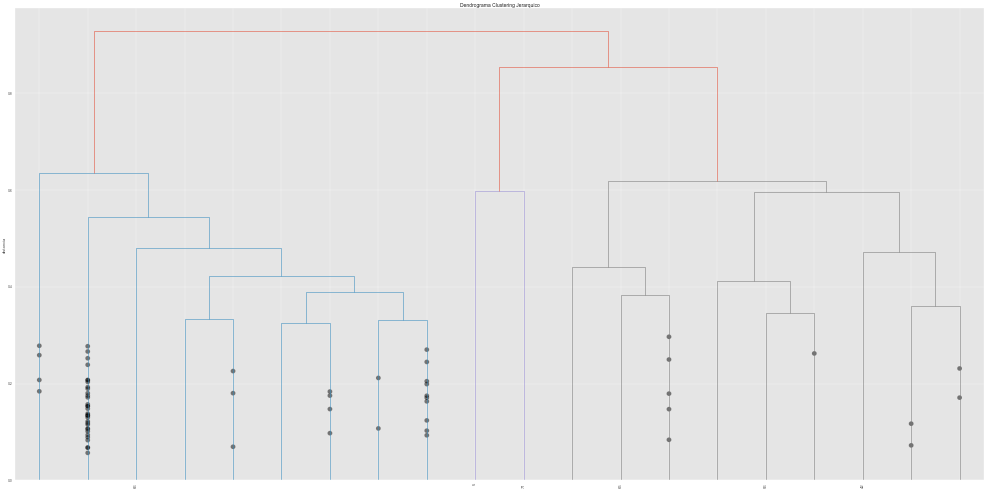

0.7658490497994465

In [46]:
df=df_2
z = linkage(df, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,
                truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

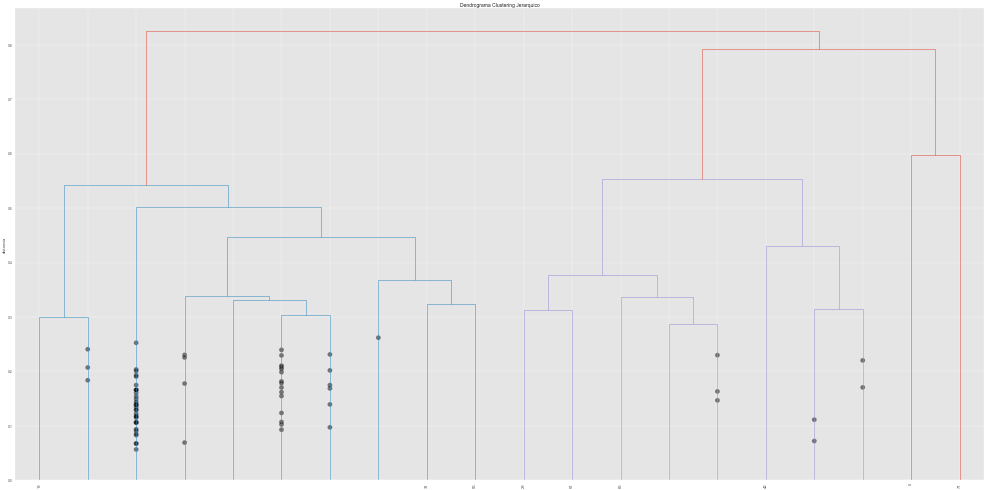

0.765070175402228

In [47]:
df=df_2
z = linkage(df, method='centroid', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

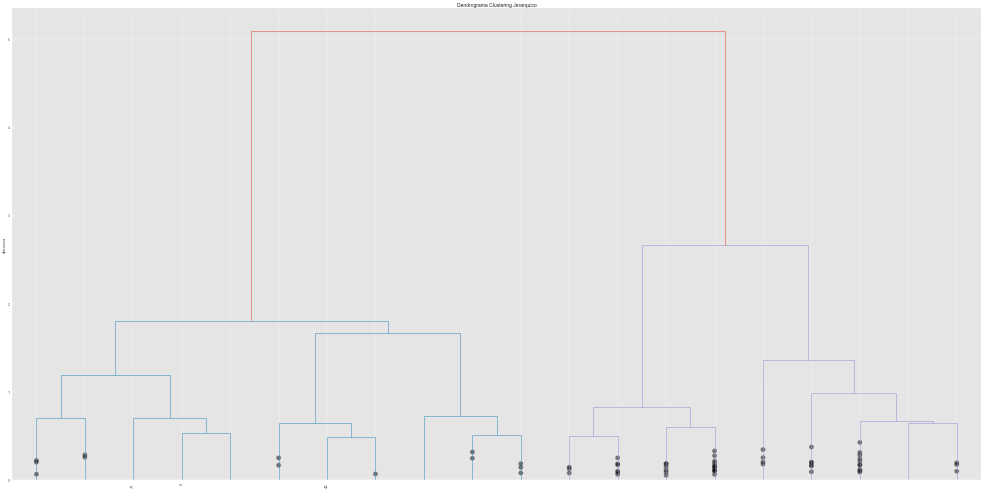

0.7042090240139793

In [48]:
df=df_2
z = linkage(df, method='ward', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,
                truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

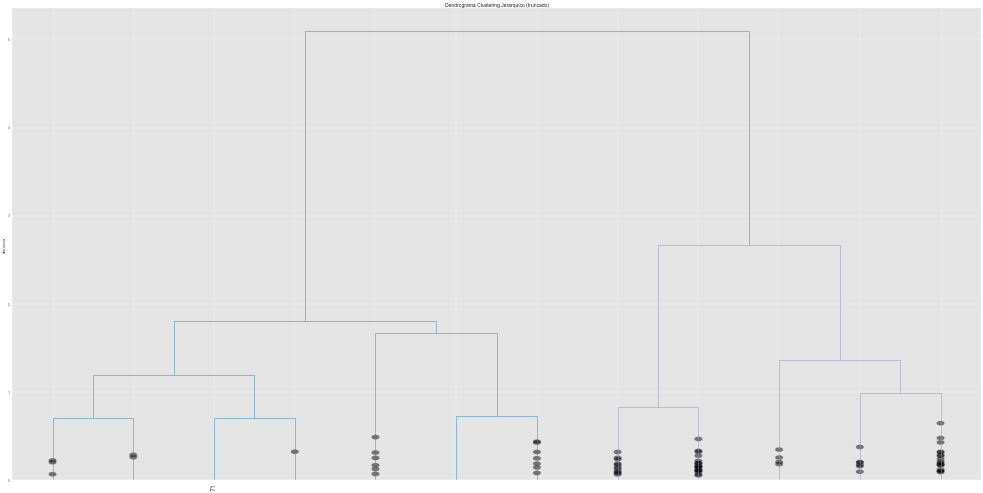

In [51]:
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Dendrograma Clustering Jerarquico (truncado)')
plt.ylabel('distancia')
plt.show()

## b) Agrupamientos similares para distintos conjuntos de datos (validación)

## Matriz de confusion, Índices de Van Dongen y Rand

In [52]:
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_predicted = cluster.fit_predict(df_2)

In [53]:
tmp = pd.DataFrame({'Labels': np.array(genre_real)[:100], 'Clusters': labels_predicted})# Create a DataFrame with labels and varieties as columns: df
tmp

,Labels,Clusters
0,jazz,3
1,jazz,6
2,jazz,2
3,jazz,6
4,jazz,8
...,...,...
95,jazz,3
96,jazz,4
97,jazz,0
98,jazz,7


### Matriz de confusión

In [54]:
ct0 = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
ct0

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
jazz,11,4,9,22,8,6,19,8,13


## Criterio Van Dongen

### Definición de la función

In [74]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [75]:
print(vanDongen(ct0))

1.0


## Indice Rand


In [76]:
# a es el número de pares de objetos que aparecen juntos en un clúster y además pertenecen a la misma clase.
# b es el número de pares de objetos que pertenecen a clases diferentes y además están en clústeres diferentes.
# c es el número de pares de objetos que comparten la clase, pero se ubican en diferentes clústeres.
# d es el número de objetos que pertenecen a clases diferentes, sin embargo se agrupan en el mismo clúster.
# n es el número total de objetos

from sklearn.metrics import adjusted_rand_score

In [77]:
hierarchy_cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_predicted = hierarchy_cluster.fit_predict(df_2)
ari0 = adjusted_rand_score(genre_real[:100], labels_predicted)
ari0

0.0

## c) Evaluar si los clusters se condicen con los géneros

### Comparación con matriz de confusión contra géneros

## d) Visualización de los clusters

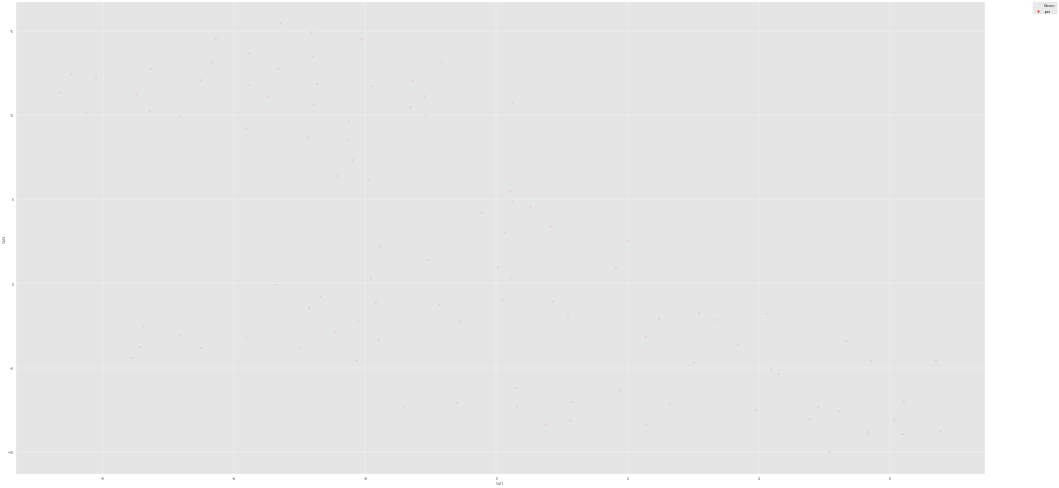

In [84]:
q = pd.Categorical(genre_real[:100])
q.codes
import seaborn as sns


tsne = TSNE(n_components=2, perplexity=20, init='pca')
Xred = tsne.fit_transform(df)

dfff = pd.DataFrame ({"Col1":Xred[:,0],"Col2":Xred[:,1],"Genero":genre_real[:100].values})
sns.scatterplot(data=dfff, x="Col1", y="Col2", hue="Genero",alpha=0.15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#    plt._legend.set_title()
plt.show()

## Conclusiones / Resultados obtenidos